# Выбор локации для скважины

Допустим, вы работаете в нефтедобывающей компании. Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль.

## Загрузка и подготовка данных

In [1]:
import pandas as pd # импорт библиотеки pandas
import numpy as np # импорт библиотеки numpy
from sklearn.linear_model import LinearRegression # импорт из библиотеки sklearn алгоритма линейной регрессии
from sklearn.model_selection import train_test_split # импорт из библиотеки sklearn функции разделения выборок
from sklearn.metrics import mean_squared_error # импорт из библиотеки sklearn функции метрики средней квадратичной ошибки
import matplotlib.pyplot as plt # импорт из библиотеки matplotlib функции построения графиков

In [2]:
# прочитаем файлы
geo_0 = pd.read_csv('***.csv')
geo_1 = pd.read_csv('***.csv')
geo_2 = pd.read_csv('***.csv')

- `id` — уникальный идентификатор скважины;
- `f0, f1, f2` — три признака точек;
- `product` — объём запасов в скважине (тыс. баррелей).

In [3]:
# посмотрим на данные
display(geo_0.head())
display(geo_0.info())
display(geo_1.head())
display(geo_1.info())
display(geo_2.head())
display(geo_2.info())

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

Пропусков в данных нет.

In [4]:
# Описание данных
display(geo_0.describe())
display(geo_1.describe())
display(geo_2.describe())

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


Распределения близки к нормальным. За исключением 1 региона по объему запасов, смещение заметнее, чем в других регионах. 

In [5]:
# поиск дубликатов
display(geo_0.duplicated().sum())
display(geo_1.duplicated().sum())
display(geo_2.duplicated().sum())

0

0

0

Дубликатов нет.

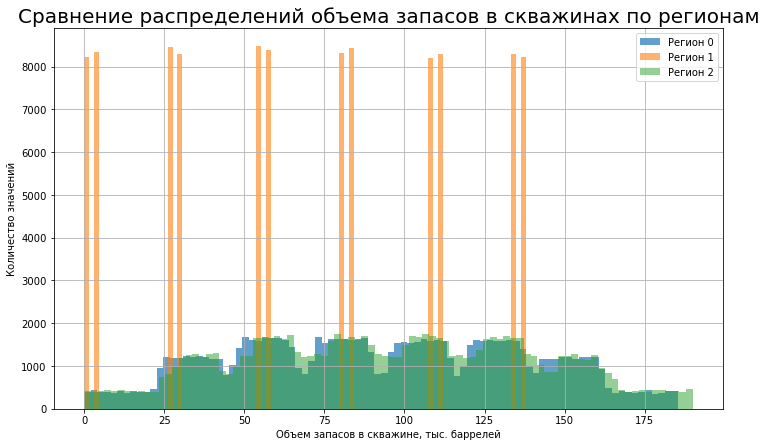

In [6]:
# Посмотрим распределения объема запасов в скважинах по регионам
plt.figure(figsize=(12,7))
geo_0['product'].hist(bins=90, alpha = 0.7)
geo_1['product'].hist(bins=90, alpha = 0.6)
geo_2['product'].hist(bins=90, alpha = 0.5)
plt.xlabel('Объем запасов в скважине, тыс. баррелей')
plt.ylabel('Количество значений')
plt.title('Сравнение распределений объема запасов в скважинах по регионам', size = '20')
plt.legend(['Регион 0', 'Регион 1', 'Регион 2'])

plt.show()

In [7]:
geo_1['product'].value_counts()

53.906522     8472
26.953261     8468
84.038886     8431
57.085625     8390
3.179103      8337
80.859783     8320
30.132364     8306
134.766305    8304
110.992147    8303
0.000000      8235
137.945408    8233
107.813044    8201
Name: product, dtype: int64

Очень странное распределение в первом регионе. Как будто кто то уже сгруппировал объемы запасов. Чуть больше 8000 в каждой группе. Так как проект учебный, мы не можем уточнить данную информацию.

In [8]:
# удалим столбец с уникальным номер скаважины, так как он не нужен для работы модели
geo_0, geo_1, geo_2 = \
    geo_0.drop('id', axis = 1), geo_1.drop('id', axis = 1), geo_2.drop('id', axis = 1)

**Выводы**

 - Пропусков в данных, дубликатов нет.
 - Есть странная особенность распределения "продукта" в 1 регионе.
 - Удален столбец 'id'. Данные готовы для дальнейшей работы.

## Обучение и проверка модели

У нас три региона, напишем функцию, которая вернет квадратный корень из среднеквадратичной ошибки, предсказания и правильные ответы на валидационной выборке.

In [9]:
def predictions(geo):
    # разделим данные на признаки и целевой признак
    features = geo.drop('product', axis= 1)
    target = geo['product']
    # разобьем данные на обучающую и валидационную выборки в соотношении 75:25
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, train_size = 0.75, random_state = 42)
    
    # обучим модель линеной регрессии
    model = LinearRegression()
    model.fit(features_train, target_train)
    # сохраним предсказания для валидационной выборки и RMSE
    predicted_valid = model.predict(features_valid)
    RMSE = mean_squared_error(target_valid, predicted_valid)**0.5
    # преобразуем предсказания в Series
    predicted_valid = pd.Series(predicted_valid)
    # сравняем индексы значений
    predicted_valid.index = target_valid.index
    # возвращаем RMSE, предсказания и правильные ответы
    return RMSE, predicted_valid, target_valid 

С помощью функции найдем RMSE, средний запас предсказанного сырья и средний запас настоящего сырья.

In [10]:
RMSE_0, predicted_valid_0, target_valid_0 = predictions(geo_0)
print(f'''Для региона 0: 
    Средний запас предсказанного сырья: {predicted_valid_0.mean():.2f} тыс. баррелей, 
    Средний запас настоящего сырья: {target_valid_0.mean():.2f} тыс. баррелей,
    RMSE: {RMSE_0:.3f}''')

Для региона 0: 
    Средний запас предсказанного сырья: 92.40 тыс. баррелей, 
    Средний запас настоящего сырья: 92.33 тыс. баррелей,
    RMSE: 37.757


In [11]:
RMSE_1, predicted_valid_1, target_valid_1 = predictions(geo_1)
print(f'''Для региона 1: 
    Средний запас предсказанного сырья: {predicted_valid_1.mean():.2f} тыс. баррелей, 
    Средний запас настоящего сырья: {target_valid_1.mean():.2f} тыс. баррелей,
    RMSE: {RMSE_1:.3f}''')

Для региона 1: 
    Средний запас предсказанного сырья: 68.71 тыс. баррелей, 
    Средний запас настоящего сырья: 68.73 тыс. баррелей,
    RMSE: 0.890


In [12]:
RMSE_2, predicted_valid_2, target_valid_2 = predictions(geo_2)
print(f'''Для региона 2: 
    Средний запас предсказанного сырья: {predicted_valid_2.mean():.2f} тыс. баррелей, 
    Средний запас настоящего сырья: {target_valid_2.mean():.2f} тыс. баррелей,
    RMSE: {RMSE_2:.3f}''')

Для региона 2: 
    Средний запас предсказанного сырья: 94.77 тыс. баррелей, 
    Средний запас настоящего сырья: 95.15 тыс. баррелей,
    RMSE: 40.146


**Выводы**

 - Для региона 1 практически нет ошибок, что неудивительно, учитывая как сгруппирован целевой признак.
 - В регионе 1 меньше всего средний объем сырья.
 - Регион 0 и 2 обладает большим запасом по сырью, по сравнению с первым регионом. Но и RMSE значительно больше.

## Подготовка к расчёту прибыли

 - При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
 - Бюджет на разработку скважин в регионе — 10 млрд рублей.
 - При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
 - После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

### Все ключевые значения для расчётов сохраним в отдельных переменных

In [13]:
BUDGET = 10_000_000_000 # бюджет
SPOTS = 500 # 500 точек для исследования
BEST_SPOTS = 200 # 200 лучших точек для разработки
INCOME = 450_000 # доход с каждой единицы продукта

### Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины

In [14]:
print(f'Для безубыточной разработки {SPOTS} скважин нужно получить в среднем по \
{BUDGET/INCOME/BEST_SPOTS:.2f} тыс. баррелей с каждой из 200 лучших точек.')

Для безубыточной разработки 500 скважин нужно получить в среднем по 111.11 тыс. баррелей с каждой из 200 лучших точек.


**Выводы**

 - Средний запас сырья по всем трем регионам не удовлетворяет среднему значению по безубыточной разработке 500 точек. 
 - Нужно правильно выбрать регион и лучшие точки с учетом рисков, чтобы компенсировать расходы на разработку.

## Напишем функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели

In [15]:
def profit(predicted_valid, target_valid):
    # выбор 200 лучших скважин с максимальными значениями предсказаний
    top_200 = predicted_valid.sort_values(ascending=False).head(BEST_SPOTS).index
    # прибыль c полученного объёма сырья
    profit = (target_valid.loc[top_200].sum()*INCOME)-BUDGET
    return profit

## Расчёт прибыли и рисков 

### Применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли

Напишем функцию, которая возвращает риск убытков, прибыль и 95%-й доверительный интервал.

In [16]:
def revenue(predicted_valid, target_valid):
    state = np.random.RandomState(42)
    values = []
    # применим bootstrap
    for i in range(1000):
        target_subsample = predicted_valid.sample(n = SPOTS, replace=True, random_state=state)
        values.append(profit(target_subsample, target_valid))
    values = pd.Series(values)
    # находим 95%-й доверительный интервал
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    # считаем риск убытков
    risk = (values < 0).mean()*100
    return risk, values, lower, upper

С помощью функции найдем риск убытков, среднюю прибыль и 95%-й доверительный интервал.

In [17]:
risk, values, lower, upper = revenue(predicted_valid_0, target_valid_0)
print(f'''Для региона 0:  
    95%-й доверительный интервал: {lower/1_000_000:.2f} : {upper/1_000_000:.2f} млн. рублей,
    Средняя прибыль: {values.mean()/1_000_000:.2f} млн. рублей,
    Риск убытков: {risk:.1f} %''')

Для региона 0:  
    95%-й доверительный интервал: -110.47 : 897.46 млн. рублей,
    Средняя прибыль: 399.58 млн. рублей,
    Риск убытков: 6.0 %


In [18]:
risk, values, lower, upper = revenue(predicted_valid_1, target_valid_1)
print(f'''Для региона 1:  
    95%-й доверительный интервал: {lower/1_000_000:.2f} : {upper/1_000_000:.2f} млн. рублей,
    Средняя прибыль: {values.mean()/1_000_000:.2f} млн. рублей,
    Риск убытков: {risk:.1f} %''')

Для региона 1:  
    95%-й доверительный интервал: 61.68 : 845.34 млн. рублей,
    Средняя прибыль: 452.05 млн. рублей,
    Риск убытков: 1.5 %


In [19]:
risk, values, lower, upper = revenue(predicted_valid_2, target_valid_2)
print(f'''Для региона 2:  
    95%-й доверительный интервал: {lower/1_000_000:.2f} : {upper/1_000_000:.2f} млн. рублей,
    Средняя прибыль: {values.mean()/1_000_000:.2f} млн. рублей,
    Риск убытков: {risk:.1f} %''')

Для региона 2:  
    95%-й доверительный интервал: -144.77 : 888.39 млн. рублей,
    Средняя прибыль: 375.01 млн. рублей,
    Риск убытков: 8.0 %


**Выводы**

 - Риск убытков для 1 региона составлет 1.5 %, что укладывается в заданные границы в 2.5%.
 - В регионе 1 максимальная средняя прибыль в 452.05 млн. рублей.
 - Наименьшая RMSE = 0.89 у 1 региона.
 - На основании выше перечисленных пунктов, можно сделать вывод, что лучшим регионом для разработки является 1 регион.